### Задача 12
Предсказать сорт винограда из которого сделано вино, используя результаты химических анализов (описание данных), c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [14]:
features = ['Type','Alcohol','Malic acid','Ash','Alcalinity of ash',\
'Magnesium','Total phenols','Flavanoids',\
'Nonflavanoid phenols','Proanthocyanins','Color intensity', \
'Hue','OD280/OD315 of diluted wines','Proline']

data = pd.read_table(filepath_or_buffer = \
'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', sep=',', names = features)

In [15]:
data.head(3)

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [16]:
X = data[data.columns[1:]] #признаки
y = data['Type'] #сорт вина

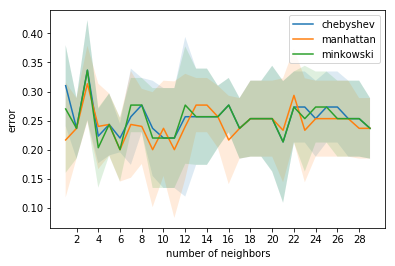

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

metrics = ['chebyshev', 'manhattan', 'minkowski']
neighbors = range(1,30)
for metric in metrics:
    error, std = [], []
    for i in neighbors: 
        knn = KNeighborsClassifier(n_neighbors=i, metric=metric).fit(X_train, y_train) 
        scores = cross_val_score(estimator=knn, X=X_test, y=y_test, cv=5)
        error.append(1 - scores.mean())
        std.append(scores.std())
    
    error = np.asarray(error)
    std = np.asarray(std)
    plt.plot(neighbors, error, label = metric)
    plt.fill_between(neighbors, error - std, error + std, alpha=0.15)

plt.xticks(neighbors[1::2])
plt.xlabel('number of neighbors')
plt.ylabel('error')
plt.legend()
plt.savefig(fname='graf12.png',format='png')
plt.show()